# Exploratory Data Analysis

In [2]:
#from sklearn.pipeline import Pipeline
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

Import data set

In [22]:
df = pd.read_csv("modified-tweets.csv") 
new_df = pd.read_csv("relabeled_first_half.csv") 
third = pd.read_csv("labeled_second_half.csv")
df = df.append(new_df, ignore_index=True)
df = df.append(third, ignore_index=True)
df.drop(columns=["description"], inplace=True)
df.dropna()
df


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,label,tweets
0,1,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...
1,1,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...
2,1,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3,1,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP..."
4,1,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...
5,1,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...
6,1,ENGLISH TRANSCRIPT : OH MURABIT! :
7,1,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...
8,1,Aslm Please share our new account after the pr...
9,1,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...


Explore data distribution 

,label
count,35533.000000
mean,0.489967
std,0.499906
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


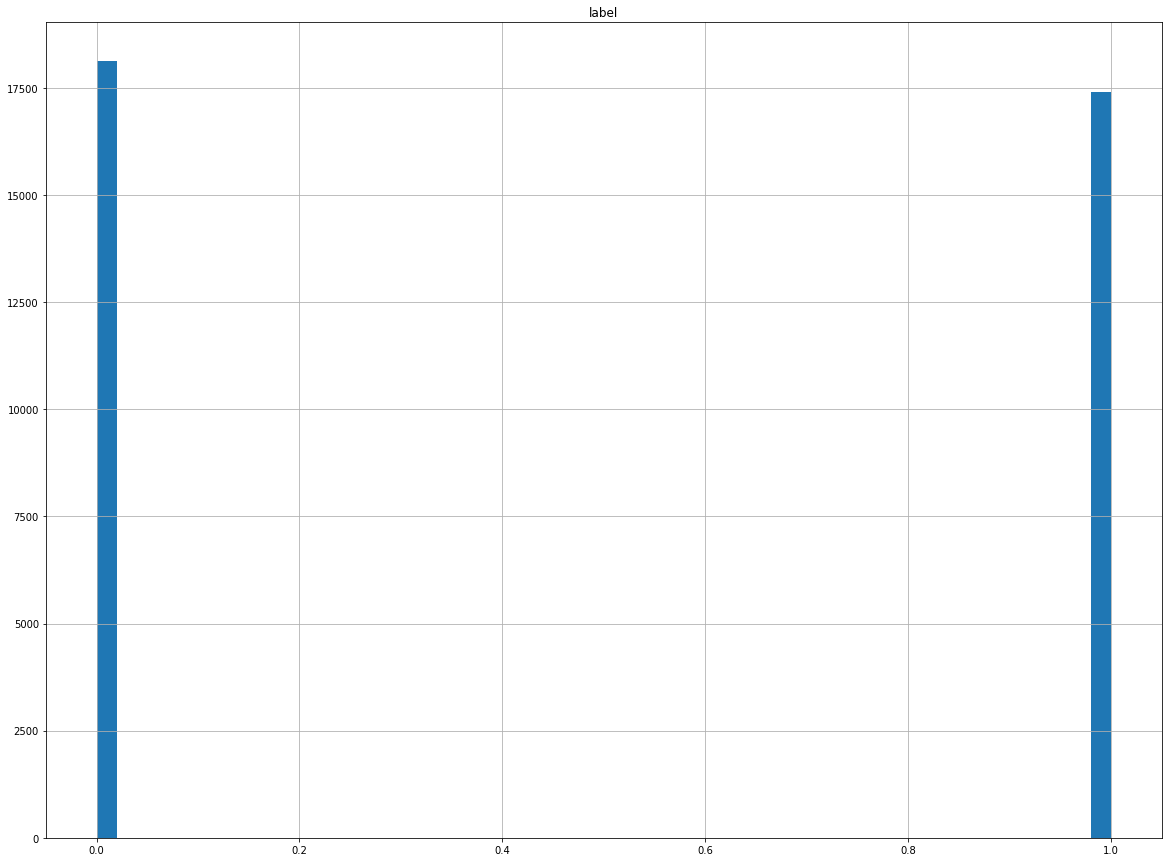

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
df.describe()

[18123 17410]


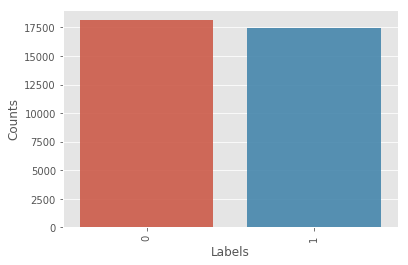

In [5]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

label_counts = df['label'].value_counts()
print(label_counts.values)
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

Shuffle data set 

In [6]:
df = df.sample(frac=1)
df.head()

,label,tweets
31047,0,@mishtal @sumdementedgeez @NermDiNermio David ...
32924,0,Not missing any of them. It is not about wome...
24893,0,Targeted #ISIS accounts
3988,1,Hahahhahahahahhahahahahhahaha
29013,0,@RepChrisSmith Obama HusseinandEthiopia PM Abi...


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


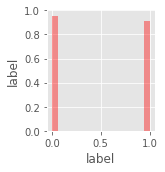

In [7]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24) 

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [15]:
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X size: ", len(X))
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
print("y_train size: ", len(y_train))
print("y_test size: ", len(y_test))


X size:  35533
X_train size:  28426
X_test size:  7107
y_train size:  28426
y_test size:  7107


# Feature Extraction

Lemmatized tweets 

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

df['text_lemmatized'] = df['tweets'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(text).lower())))

X_lemmatized = df['text_lemmatized']



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lramirez5/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lramirez5/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Remove stop words

In [10]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

X_new = []
for tweet in X_lemmatized:
    word_tokens = word_tokenize(tweet)    
    filtered_sentence = [w for w in word_tokens if not w in stop_words]    #X_new.append(.join(word[0] for word in filtered_sentence))
    X_new.append(' '.join(filtered_sentence))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lramirez5/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using wordcloud to see the different in vocabulary use for pro-ISIS and anti-ISIS tweets. 

Wordcloud of Entire Dataset


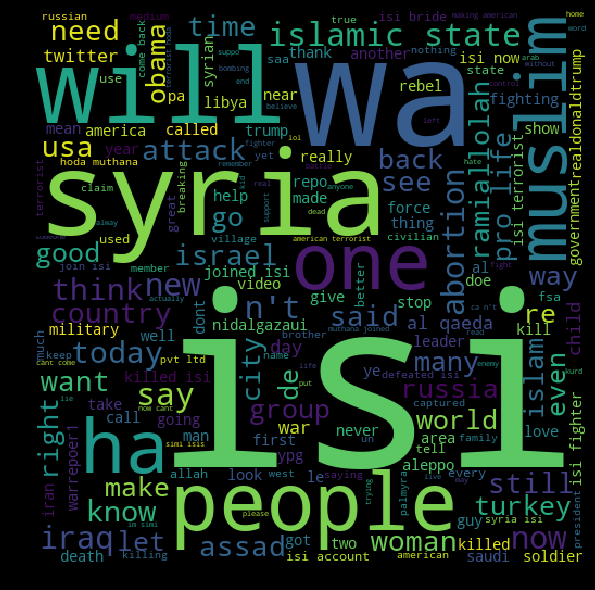

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# entire dataset
print("Wordcloud of Entire Dataset")
words = ''.join(list(df['text_lemmatized']))
wordcloud = WordCloud(width = 512,height = 512).generate(words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


Wordcloud of ISIS Dataset


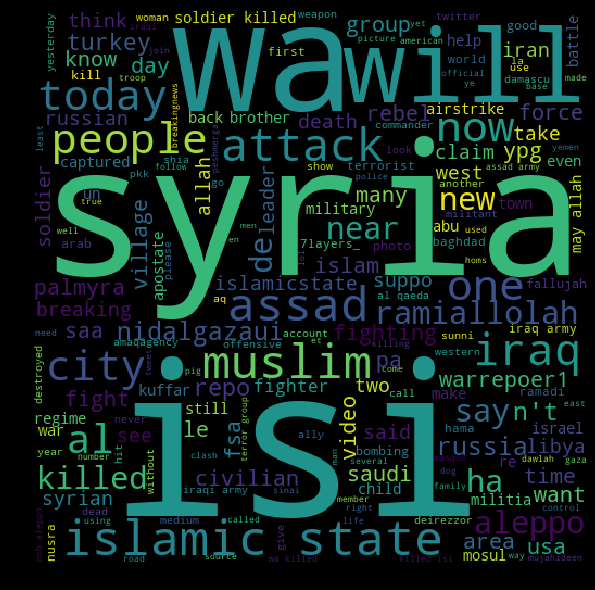

In [18]:
# isis dataset
print("Wordcloud of ISIS Dataset")
isis_words = ''.join(list(df[df['label']==1]['text_lemmatized']))
isis_wordcloud = WordCloud(width = 512,height = 512).generate(isis_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(isis_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Wordcloud of Non-ISIS Dataset


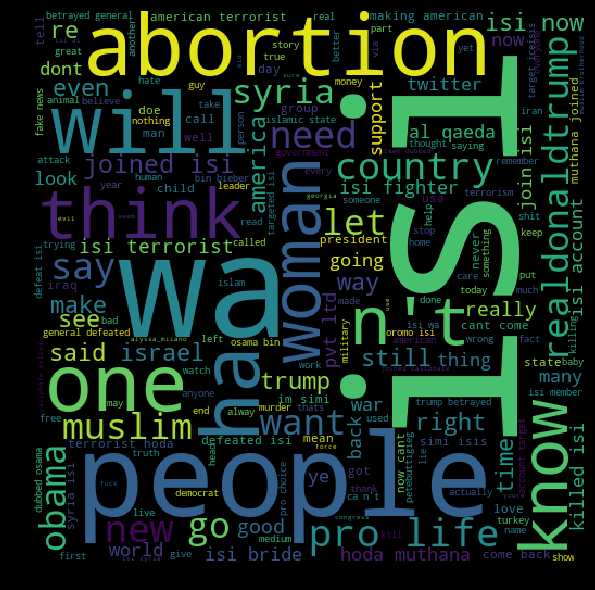

In [19]:
# non-isis dataset
print("Wordcloud of Non-ISIS Dataset")
nonisis_words = ''.join(list(df[df['label']==0]['text_lemmatized']))
nonisis_wordcloud = WordCloud(width = 512,height = 512).generate(nonisis_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(nonisis_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Split data for training and testing

In [16]:

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_lemmatized, y, test_size=0.2)


In [17]:
#count_vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
#count_vect = CountVectorizer(lowercase=True, stop_words='english')
#count_vect = CountVectorizer(lowercase=True, stop_words='english', binary=True)
count_vect = CountVectorizer()

X_train_reduce = X_train[:int(len(X_train)/2)]

X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts.shape)

print("Type of the occurance count matrix (should be sparse): ")
print(type(X_train_counts))

X_test_counts = count_vect.transform(X_test)
print(X_test_counts.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)


(28426, 38526)
Type of the occurance count matrix (should be sparse): 
<class 'scipy.sparse.csr.csr_matrix'>
(7107, 38526)
(28426, 38526)
(7107, 38526)


# Naive Bayes

In [18]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


Gaussian Naive Bayes with CountVectorizer and Tfidf. Tfidf regularize the data. 

In [86]:
%%time

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_counts.toarray(),y_train)
y_predict = gnb.predict(X_test_counts.toarray())

CPU times: user 49.1 s, sys: 1min 52s, total: 2min 41s
Wall time: 3min 6s


In [87]:

accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.835232869002392

Test Confusion Matrix:
[[2636 1059]
 [ 112 3300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      3695
           1       0.76      0.97      0.85      3412

   micro avg       0.84      0.84      0.84      7107
   macro avg       0.86      0.84      0.83      7107
weighted avg       0.86      0.84      0.83      7107



Hyperparameter tuning for Bernoulli Naive Bayes. 

In [19]:
tuned_parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

clf = GridSearchCV(BernoulliNB(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train_tfidf.toarray()[:5000], np.array(y_train)[:5000])
    
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = np.array(y_test)[:5000], clf.predict(X_test_tfidf.toarray()[:5000])
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'alpha': 0.1}

Grid scores on development set:

0.858 (+/-0.019) for {'alpha': 1}
0.869 (+/-0.018) for {'alpha': 0.1}
0.866 (+/-0.016) for {'alpha': 0.001}
0.864 (+/-0.014) for {'alpha': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.88      0.85      0.86      2530
          1       0.85      0.88      0.86      2470

avg / total       0.86      0.86      0.86      5000




In [20]:
%%time 
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.1)
clf.fit(X_train_counts.toarray(), y_train)
y_predict = clf.predict(X_test_counts.toarray())

CPU times: user 27.7 s, sys: 35.5 s, total: 1min 3s
Wall time: 47.4 s


In [21]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.9036161530885043

Test Confusion Matrix:
[[3166  459]
 [ 226 3256]]

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.87      0.90      3625
          1       0.88      0.94      0.90      3482

avg / total       0.91      0.90      0.90      7107



In [73]:
%%time 
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.1)
clf.fit(X_train_tfidf.toarray(), y_train)
y_predict = clf.predict(X_test_tfidf.toarray())

CPU times: user 27.3 s, sys: 42.8 s, total: 1min 10s
Wall time: 1min 12s


In [74]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.9109328830730266

Test Confusion Matrix:
[[3198  420]
 [ 213 3276]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3618
           1       0.89      0.94      0.91      3489

   micro avg       0.91      0.91      0.91      7107
   macro avg       0.91      0.91      0.91      7107
weighted avg       0.91      0.91      0.91      7107



In [17]:
tuned_parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

clf = GridSearchCV(MultinomialNB(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train_tfidf.toarray()[:5000], np.array(y_train)[:5000])
    
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = np.array(y_test)[:5000], clf.predict(X_test_tfidf.toarray()[:5000])
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'alpha': 0.1}

Grid scores on development set:

0.844 (+/-0.017) for {'alpha': 1}
0.872 (+/-0.019) for {'alpha': 0.1}
0.868 (+/-0.023) for {'alpha': 0.01}
0.864 (+/-0.025) for {'alpha': 0.001}
0.860 (+/-0.029) for {'alpha': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.86      0.92      0.89      2586
          1       0.91      0.84      0.87      2414

avg / total       0.88      0.88      0.88      5000




In [22]:
%%time 

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_counts.toarray(), y_train)
y_predict = nb_model.predict(X_test_counts.toarray())

CPU times: user 18.6 s, sys: 29.5 s, total: 48.1 s
Wall time: 47.9 s


In [26]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.9207823272829605

Test Confusion Matrix:
[[3439  186]
 [ 377 3105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3625
           1       0.94      0.89      0.92      3482

   micro avg       0.92      0.92      0.92      7107
   macro avg       0.92      0.92      0.92      7107
weighted avg       0.92      0.92      0.92      7107



Calculate tfidf for Multinomail using optimal model

In [14]:
%%time 

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf.toarray(), y_train)
y_predict = nb_model.predict(X_test_tfidf.toarray())

CPU times: user 7.52 s, sys: 6.74 s, total: 14.3 s
Wall time: 13.4 s


In [31]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.9213451526663853

Test Confusion Matrix:
[[3438  187]
 [ 372 3110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3625
           1       0.94      0.89      0.92      3482

   micro avg       0.92      0.92      0.92      7107
   macro avg       0.92      0.92      0.92      7107
weighted avg       0.92      0.92      0.92      7107



N-gram on optimal model

In [33]:
%%time


vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
X_train_counts = vectorizer.fit_transform(X_train)
print(X_train_counts.shape)
X_test_counts = vectorizer.transform(X_test)
print(X_test_counts.shape)

nb_model.fit(X_train_counts.toarray(),y_train)
y_predict = nb_model.predict(X_test_counts.toarray())

accuracy_score_test = np.mean(y_predict == y_test)
print(str(1)+'-gram accuracy:', accuracy_score_test)

(28426, 38973)
(7107, 38973)
1-gram accuracy: 0.9207823272829605
CPU times: user 18.1 s, sys: 25.6 s, total: 43.7 s
Wall time: 40.8 s


In [15]:
%%time 

vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_train_counts = vectorizer.fit_transform(X_train)
print(X_train_counts.shape)
X_test_counts = vectorizer.transform(X_test)
print(X_test_counts.shape)

nb_model.fit(X_train_counts.toarray(),y_train)
y_predict = nb_model.predict(X_test_counts.toarray())

accuracy_score_test = np.mean(y_predict == y_test)
print(str(2)+'-gram accuracy:', accuracy_score_test)

(28426, 198333)
(7107, 198333)
2-gram accuracy: 0.8460672576333192
CPU times: user 1min 5s, sys: 1min 46s, total: 2min 52s
Wall time: 2min 47s


In [16]:
%%time 

vectorizer = CountVectorizer(analyzer='word', ngram_range=(3,3))
X_train_counts = vectorizer.fit_transform(X_train)
print(X_train_counts.shape)
X_test_counts = vectorizer.transform(X_test)
print(X_test_counts.shape)

nb_model.fit(X_train_counts.toarray(),y_train)
y_predict = nb_model.predict(X_test_counts.toarray())

accuracy_score_test = np.mean(y_predict == y_test)
print(str(3)+'-gram accuracy:', accuracy_score_test)

(28426, 298283)
(7107, 298283)
3-gram accuracy: 0.7567187280146335
CPU times: user 1min 40s, sys: 2min 46s, total: 4min 26s
Wall time: 4min 20s
